## Análisis - Ligue 1 temporada 2015/2016 (masculina)

Vamos a hacer un análisis de las distintas competiciones (las cinco grandes ligas durante la temporada 2015-2016 y de todos los partidos en general) para poder entender que características son más importantes a la hora de tomar la decisión por parte del modelo de ML para decidir si el equipo va a ganar, perder o empatar el partido.

En este notebook en cuestión, vamos a analizar la Ligue 1 en la temporada 2015/2016 (masculina).

Cargamos los datos de los partidos sobre la competición para entrenar el modelo y poder hacer el estudio de explicabilidad.

In [1]:
import os
import pandas as pd


competition_name = "Ligue 1"
competition_gender = "male"
season_name = "2015/2016"
season_name_for_filename = "2015_2016"

output_dir = "data/reduced/"
filename = f"{competition_name}({season_name_for_filename}_{competition_gender})_reduced.csv"
output_path = os.path.join(output_dir, filename)

if os.path.exists(output_path):
    print(f"Matches from the competition loaded from {output_path}")
    matches_in_Ligue1 = pd.read_csv(output_path)
else:
    print("You don't have data from the competition yet. Please run the notebook '0_datasets_building.ipynb' first.")

Matches from the competition loaded from data/reduced/Ligue 1(2015_2016_male)_reduced.csv


In [2]:
matches_in_Ligue1.head(5)

,match_id,shots_on_target_ratio_home,shots_on_target_ratio_away,average_shots_on_target_distance_home,average_shots_on_target_distance_away,shots_inside_area_ratio_home,shots_inside_area_ratio_away,pass_success_ratio_home,pass_success_ratio_away,cross_success_ratio_home,...,percentage_shots_under_pressure_home,percentage_shots_inside_area_under_pressure_home,percentage_passes_under_pressure_home,percentage_passes_inside_area_under_pressure_home,percentage_set_piece_shots_home,percentage_set_piece_shots_inside_area_home,percentage_substitutions_home,percentage_tactical_substitutions_home,percentage_tactical_changes_home,percentage_formation_changes_home
0,3829421,0.333333,0.166667,25.129294,12.803802,0.555556,0.583333,0.763676,0.809074,0.307692,...,0.333333,0.333333,0.566265,1.0,0.555556,0.666667,0.5,0.50,0.750000,0.666667
1,3829420,0.307692,0.428571,20.107446,19.128651,0.230769,0.714286,0.747412,0.783058,0.500000,...,0.375000,0.166667,0.565217,0.5,0.500000,0.222222,0.5,0.40,0.444444,0.750000
2,3829413,0.166667,0.333333,21.737917,19.467647,0.333333,0.833333,0.798755,0.829213,0.200000,...,0.000000,0.000000,0.520000,0.0,0.666667,0.500000,0.5,0.50,0.500000,0.000000
3,3829416,0.333333,0.352941,12.209684,15.420536,0.666667,0.764706,0.741688,0.810964,0.250000,...,0.250000,0.285714,0.514085,0.0,0.384615,0.333333,0.5,0.25,0.625000,1.000000
4,3829422,0.227273,0.500000,20.112628,20.723704,0.500000,0.500000,0.876560,0.786082,0.142857,...,0.444444,0.600000,0.684564,1.0,0.875000,0.875000,0.5,0.50,0.500000,0.500000


Una vez ya tenemos los datos cargados, entrenamos el mejor modelo (seleccionado tras la experimentación) y mostramos sus resultados.

In [3]:
from src.analysis import ligue1_best_model

best_model_Ligue1, evaluation_metrics, X_train_Ligue1, X_test_Ligue1, encoder_Ligue1, match_ids_test = ligue1_best_model(matches_in_Ligue1)
print(f"The best model for Ligue 1 is {best_model_Ligue1}")
print(f"The evaluation metrics for the best model are:")
evaluation_metrics.head()

The best model for Ligue 1 is RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=2, n_estimators=60, random_state=42)
The evaluation metrics for the best model are:


,Train Accuracy,Test Accuracy,Precision Macro,Precision Weighted,Recall Macro,Recall Weighted,F1 Macro,F1 Weighted
Random Forest,0.774086,0.618421,0.591787,0.60164,0.589015,0.618421,0.581168,0.601067


Una vez ya tenemos el mejor modelo entrenado comenzamos el análisis de explicabilidad.

### Estudio global

Vamos a comenzar por un estudio global. 

En este caso, al ser el mejor modelo Random Forest, nos basaremos en la importancia de las características proporcionada por el modelo a través del método `feature_importances_`.
- A diferencia de la regresión logística, que asigna coeficientes específicos a cada clase, Random Forest evalúa la relevancia de cada variable para el modelo en su conjunto, sin distinguir entre clases.
- Este modelo captura tanto relaciones lineales como no lineales, permitiendo analizar interacciones entre múltiples factores y su impacto en la predicción del resultado.
- Sin embargo, no indica la dirección del efecto de cada característica (positiva o negativa), sino únicamente su importancia relativa en el rendimiento del modelo.

El gráfico presentado a continuación muestra la importancia global de cada característica en la predicción de los resultados de los partidos en la Ligue 1.
- Valores más altos indican que una característica tiene mayor peso en las predicciones del modelo.
- Valores cercanos a cero indican que la característica no aporta información significativa para la clasificación del resultado.

Este análisis nos permite identificar qué factores son clave en la predicción del resultado de los partidos, considerando relaciones más complejas y capturando patrones que un modelo lineal no podría detectar.

Features with zero importance across all classes:
['tackles_success_ratio_home', 'dribbles_success_ratio_away', 'possession_percentage_home', 'last_3_matches_form_home', 'is_valid_last_3_matches_form_home', 'is_valid_last_3_matches_form_away', 'is_valid_win_rate_last_5_matches_home', 'win_rate_last_5_matches_away', 'is_valid_win_rate_last_5_matches_away', 'win_last_home_match_home_team', 'is_valid_win_last_home_match_home_team', 'win_last_away_match_away_team', 'is_valid_win_last_away_match_away_team', 'goals_conceded_last_match_home', 'is_valid_goals_conceded_last_match_home', 'goals_conceded_last_match_away', 'is_valid_goals_conceded_last_match_away', 'is_valid_goals_scored_last_match_home', 'goals_scored_last_match_away', 'is_valid_goals_scored_last_match_away', 'is_valid_std_shots_last_3_matches_home', 'percentage_shots_other_home', 'percentage_corners_home', 'percentage_recoveries_home', 'percentage_tackles_home', 'percentage_penaltys_committed_home', 'percentage_key_errors_home',

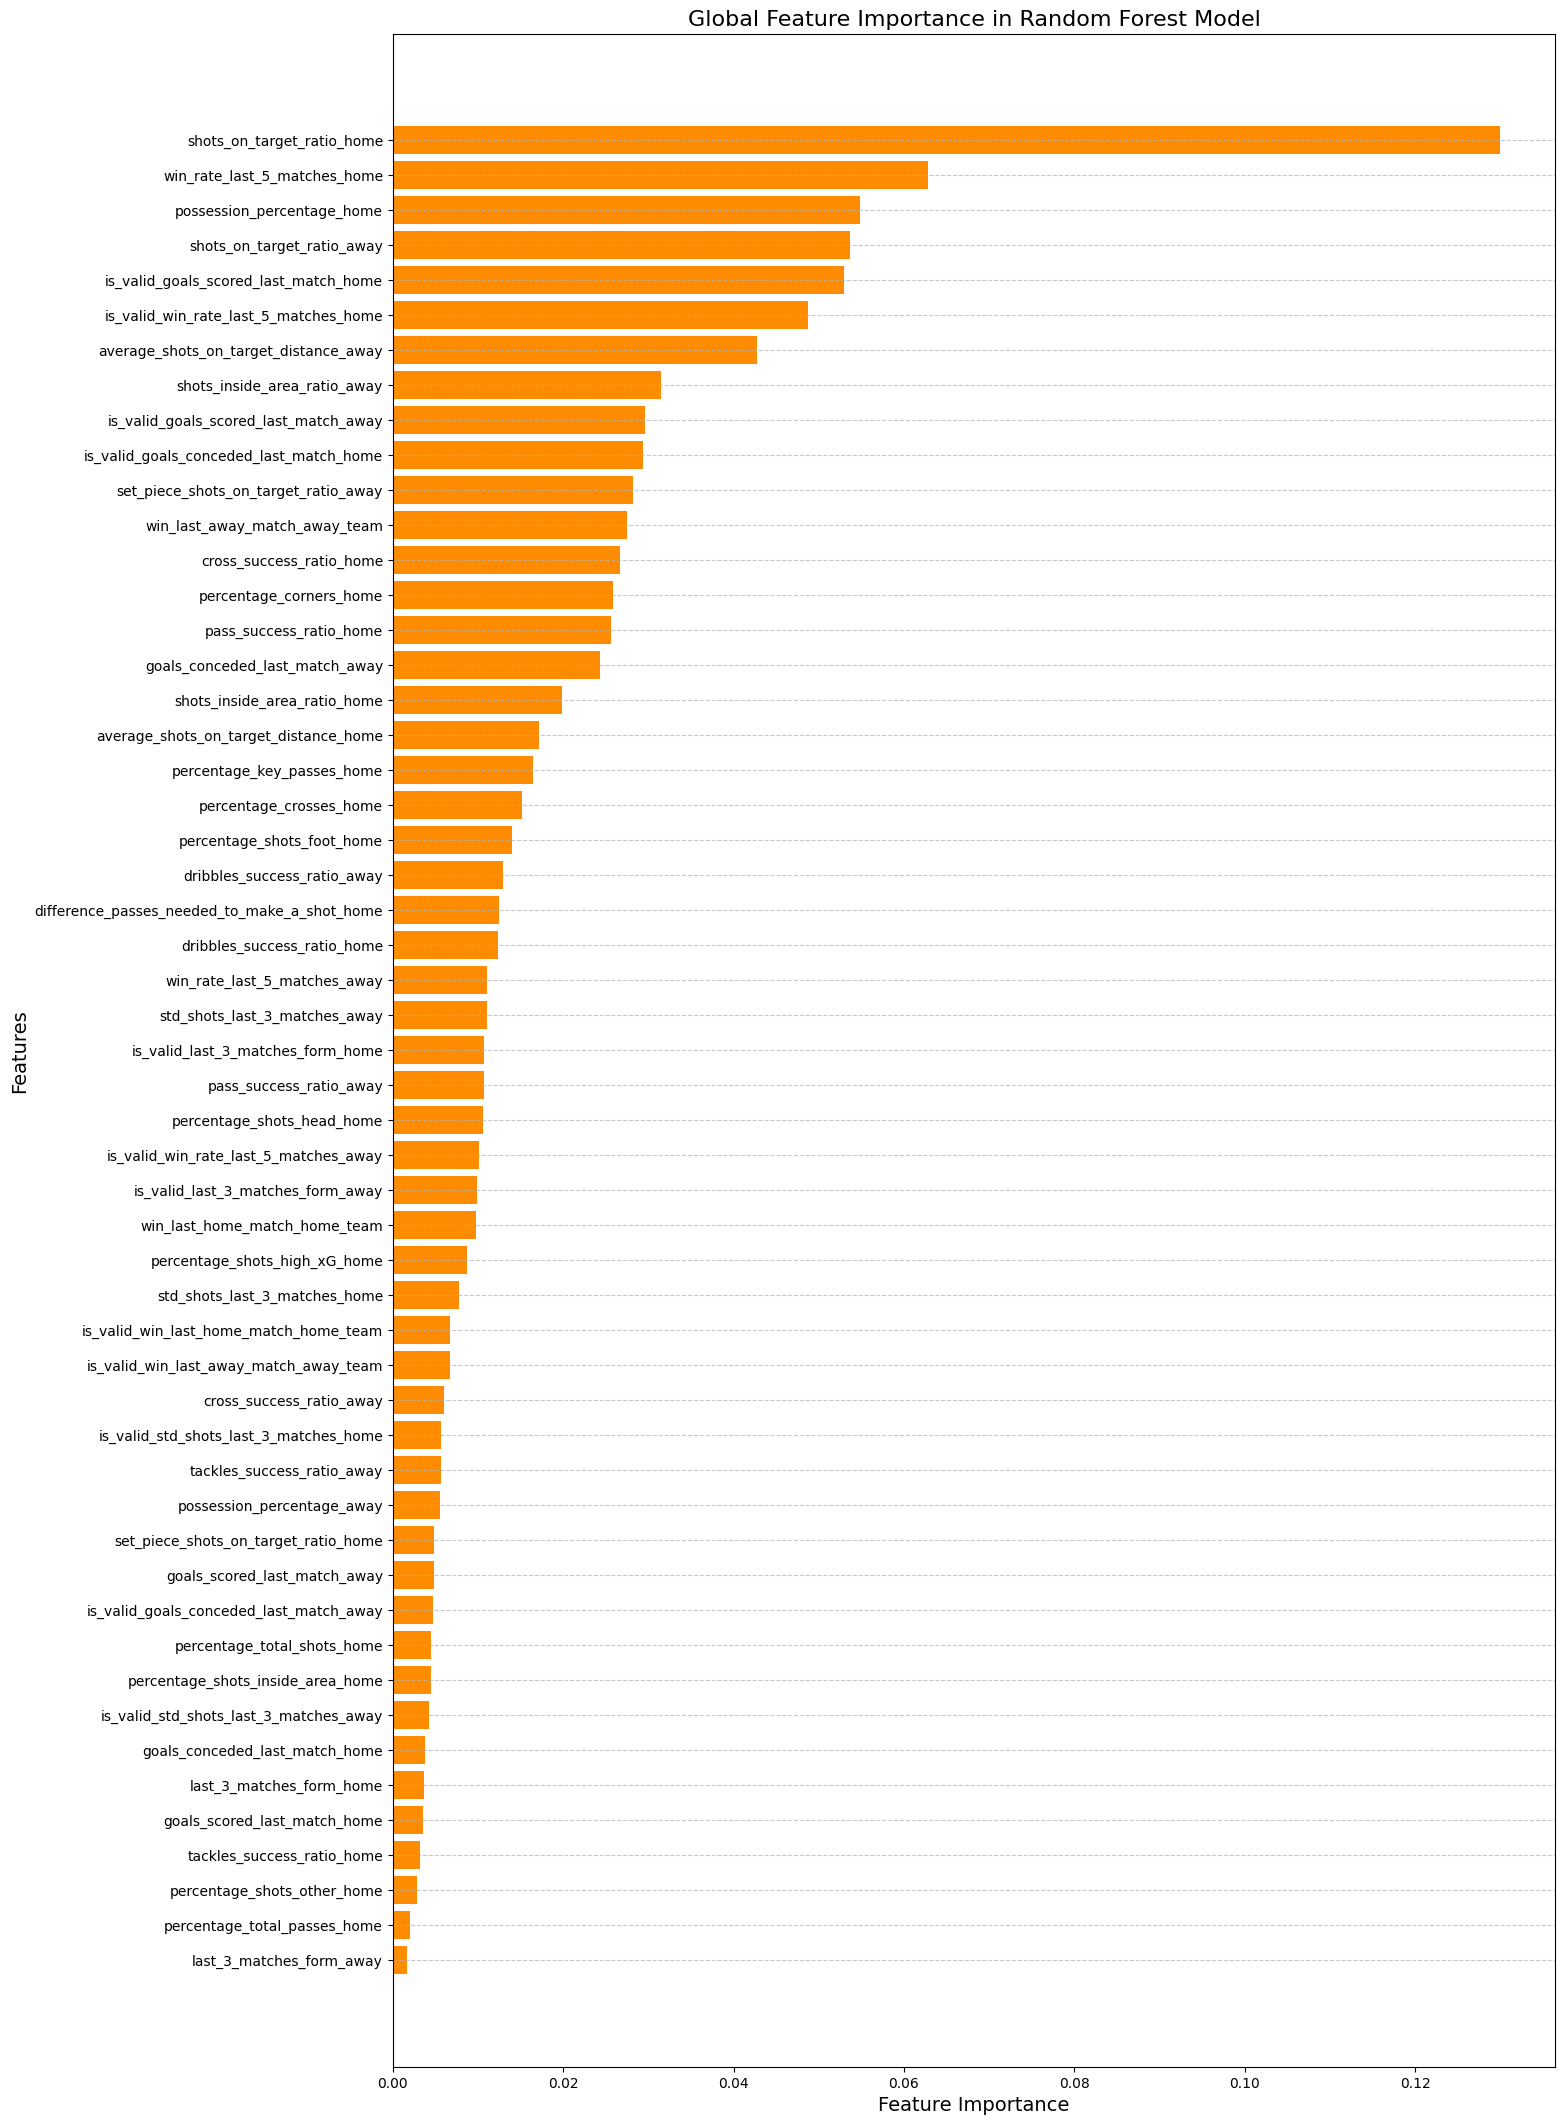

In [4]:
from src.analysis import random_forest_global_analysis

random_forest_global_analysis(best_model_Ligue1)

El modelo Random Forest ha determinado la relevancia de cada característica en la predicción del resultado de los partidos en la Ligue 1. A diferencia de la Regresión Logística, aquí se mide la importancia relativa de cada variable para el modelo en su conjunto, sin distinguir entre clases específicas (victoria local, empate o victoria visitante). Vamos a analizar el gráfico:

- **Caracterísiticas más importantes en la predicción**: Las características con mayor importancia en el modelo son aquellas que han tenido un impacto significativo en la clasificación del resultado del partido. Aunque no podemos determinar si una variable favorece a un equipo u otro, sí podemos intuir que estas características han sido relevantes en la toma de decisiones del modelo.
    - `shots_on_target_ratio_home`: El porcentaje de tiros a puerta del equipo local es la variable más influyente en el modelo. Esto sugiere que la precisión en los disparos es un aspecto clave para el resultado final del partido.
    - `win_rate_last_5_matches_home`: El rendimiento reciente del equipo local ha sido identificado como un factor relevante. Esto indica que los resultados obtenidos en los últimos encuentros han tenido una relación con el desenlace de los partidos en la competición.
    - `possession_percentage_away`: El porcentaje de posesión del equipo visitante ha sido una de las métricas con más peso. Aunque no podemos afirmar si más posesión se traduce en mejores resultados, sí podemos intuir que el control del balón está vinculado a ciertos patrones que el modelo ha identificado como influyentes.
    - `shots_on_target_ratio_away`: Al igual que ocurre con el equipo local, el porcentaje de tiros a puerta del equipo visitante es una característica importante. Esto refuerza la idea de que la generación de oportunidades y la precisión en los disparos tienen un papel determinante en el resultado del partido.
    - `is_valid_goals_scored_last_match_home`, `is_valid_goals_scored_last_match_away` y `is_valid_goals_conceded_last_match_home`: La variable que indica si los goles anotados/encajados en el último partido de los equipos fueron válidos (si tienen un significado válido porque ha habido un partido anterior de ese equipo) también ha sido considerada importante. Esto sugiere que el modelo ha encontrado una relación entre el desempeño ofensivo reciente, el desempeño defensivo reciente y los resultados de los partidos analizados.
    - `is_valid_win_rate_last_5_matches_home`: La varibale que indica si se pueden considerar el porcentaje de victoria del equipo local en los últimos cinco partidos se considera como importante. Esto sugiere que la forma en la que llega el equipo local tiene importancia en el resultado.
    - `average_shots_on_target_distance_away` y `average_shots_on_target_distance_home`: La distancia media de los tiros a puerta del equipo visitante y local cobran también importancia en la predicción del resultado del partido.
    - `shots_inside_area_ratio_away` y `shots_inside_area_ratio_home`: La frecuencia con la que los equipos logran disparar dentro del área también es una métrica con un peso relevante. Dado que los tiros dentro del área suelen tener una mayor probabilidad de acabar en gol, su importancia dentro del modelo es comprensible.
    - `set_piece_shots_on_target_ratio_away`: La precisión en jugadas a balón parado del equipo visitante también ha sido destacada por el modelo. Esto podría indicar que las acciones de estrategia como córners o tiros libres han tenido un peso en la predicción de los partidos.
    - `win_last_away_match_away_team`: Que el equipo visitante haya ganado o no su último partido fuera de casa influye también en el resultado. Con esto podemos deducir que la forma en su último partido en el que se encuentra en la misma situación (juega también fuera de casa) influye en el resultado.
    - `cross_success_ratio_home`, `pass_success_ratio_home` y `percentage_key_passes_home`: La efectividad en los centros, pases y los pases clave del equipo local han sido consideradas métricas relevantes. Esto sugiere que la calidad en la generación de jugadas de ataque es un aspecto que el modelo ha relacionado con los resultados de los partidos.
    - `difference_passes_needed_to_make_a_shot`: El estilo de juego en el partido de los equipos va a influir en el resultado. Veremos más adelante si favorece más a la victoria los equipos verticales (necesitan menos pases para realizar disparos) o los equipo más conservadores y que le dan mucha relevancia al control del juego (necesitan más pases para realizar disparos).

- **Características sin importancia en la predicción**: El modelo ha determinado que varias características no aportan información relevante en la clasificación del resultado del partido. Esto no significa que estas variables no tengan influencia en el fútbol en la Ligue 1, sino que, dentro de los datos analizados, el modelo no ha encontrado una relación clara con los resultados.
    - **Factores relacionados con el rendimiento reciente**:  Variables como `last_3_matches_form_home`, `last_3_matches_form_away`, `win_last_home_match_home_team` y `win_last_away_match_away_team` no han sido consideradas relevantes. Esto sugiere que, aunque el rendimiento reciente pueda ser un indicador del estado de forma de un equipo, los resultados individuales más cercanos no han sido determinantes en la predicción del modelo.
    - **Estadísticas defensivas y disciplinares**: 
        - Curiosamente, métricas como `tackles_success_ratio_home`, `percentage_tackles_home` y `percentage_recoveries_defensive_third_home` no han tenido importancia en el modelo. Esto podría indicar que el rendimiento defensivo es más difícil de modelar en términos de predicción de resultados, ya que su impacto puede depender de múltiples factores externos.
        - Otras métricas descartadas incluyen las tarjetas rojas (`percentage_red_cards_home`), las faltas cometidas (`percentage_penaltys_committed_home`) y los errores clave (`percentage_key_errors_home`). Su falta de relevancia sugiere que, aunque estos eventos pueden influir en ciertos partidos individuales, no han mostrado un patrón consistente en los datos analizados.
    - **Métricas ofensivas**: Es curioso como métricas ofensivas tan importantes como `percentage_shots_high_xG_home` tengan una importancia tan reducida a la hora de predecir el resultado.
    - **Otros factores tácticos y de juego**: El modelo también ha descartado estadísticas como `percentage_counterattacks_home` y `percentage_substitutions_home`. Esto podría indicar que la cantidad de veces que un equipo realiza estas acciones no tiene una relación clara con el desenlace del partido, o que su impacto depende de otros factores no considerados en el modelo.

**Conclusiones generales**: 

El modelo de Random Forest ha identificado que las métricas más relevantes para predecir el resultado de los partidos en la Ligue 1 están relacionadas con la eficiencia ofensiva y la generación de oportunidades de gol. Factores como la precisión en los tiros a puerta, la capacidad de generar disparos dentro del área y la posesión del balón han sido claves en la predicción del modelo.

Por otro lado, el modelo ha descartado métricas relacionadas con la defensa, la recuperación del balón y el rendimiento en los últimos partidos individuales, lo que sugiere que estos factores no han mostrado una relación clara con los resultados analizados. La falta de importancia de variables como los tackles, las recuperaciones y las tarjetas rojas indica que estos aspectos pueden no ser determinantes en la predicción del resultado final.

Es importante destacar que, aunque ciertas métricas han sido identificadas como más relevantes que otras, el modelo no nos indica en qué dirección afectan al resultado, solo que han sido utilizadas con mayor peso en la clasificación. Esto significa que, por ejemplo, una mayor posesión o un mayor número de tiros a puerta pueden estar correlacionados con el resultado, pero no podemos determinar si su aumento favorece a un equipo o simplemente es una característica común en los datos analizados.

En términos tácticos, podemos intuir que los equipos que logran generar oportunidades claras, tienen precisión en sus disparos y mantienen la posesión son los que tienen más probabilidades de obtener resultados favorables. Además, la importancia de las jugadas a balón parado sugiere que estas situaciones han jugado un papel clave en los desenlaces de los partidos.

En conclusión, la Ligue 1 parece estar influenciada en gran medida por el rendimiento ofensivo y la capacidad de generar ocasiones de gol. Aunque el modelo no nos dice exactamente cómo influyen estas características en cada partido, sí nos permite entender qué factores han sido más utilizados para la predicción del resultado. Esto aporta información valiosa para el análisis de los partidos del fútbol francés.

### Estudio local

Ahora comenzamos el análisis de explicabilidad utilizando SHAP. 

El análisis SHAP (SHapley Additive exPlanations) nos permite interpretar el impacto de cada característica en la predicción del modelo. A diferencia de los coeficientes lineales, SHAP captura interacciones entre variables y muestra el impacto individual de cada una en cada predicción. En este documento analizaremos los resultados obtenidos para la predicción de los partidos de la Ligue 1.

Cada uno de los siguientes gráficos representa la importancia de las variables en la predicción de cada posible resultado:
- Victoria del equipo visitante (away_team).
- Empate (draw).
- Victoria del equipo local (home_team).

**Interpretación de los gráficos SHAP**: Cada punto en el gráfico representa un partido. Los valores en el eje X indican el impacto de una característica específica en la predicción del modelo:
- Valores positivos: Incrementan la probabilidad de que el partido termine con el resultado indicado.
- Valores negativos: Disminuyen la probabilidad del resultado.
- Color: Representa el valor de la característica. Rojo indica valores altos y azul valores bajos.

In [5]:
from src.analysis import compute_shap_values

feature_names_list_Ligue1 = list(best_model_Ligue1.feature_names_in_)
shap_values_Ligue1 = compute_shap_values(best_model_Ligue1, X_train_Ligue1, X_test_Ligue1, feature_names_list_Ligue1)

Class 0: away_team
Important features (35):
['shots_on_target_ratio_home', 'shots_on_target_ratio_away', 'average_shots_on_target_distance_home', 'average_shots_on_target_distance_away', 'shots_inside_area_ratio_home', 'shots_inside_area_ratio_away', 'pass_success_ratio_home', 'pass_success_ratio_away', 'cross_success_ratio_home', 'cross_success_ratio_away', 'possession_percentage_away', 'set_piece_shots_on_target_ratio_away', 'last_3_matches_form_away', 'goals_scored_last_match_home', 'percentage_total_shots_home', 'percentage_shots_high_xG_home', 'percentage_shots_inside_area_home', 'percentage_shots_foot_home', 'percentage_shots_head_home', 'percentage_total_passes_home', 'percentage_key_passes_home', 'difference_passes_needed_to_make_a_shot_home', 'percentage_crosses_home', 'percentage_blocks_home', 'percentage_duels_won_home', 'percentage_clearance_home', 'percentage_yellow_cards_home', 'percentage_red_cards_home', 'percentage_counterpress_home', 'percentage_dispossessed_home', 'p

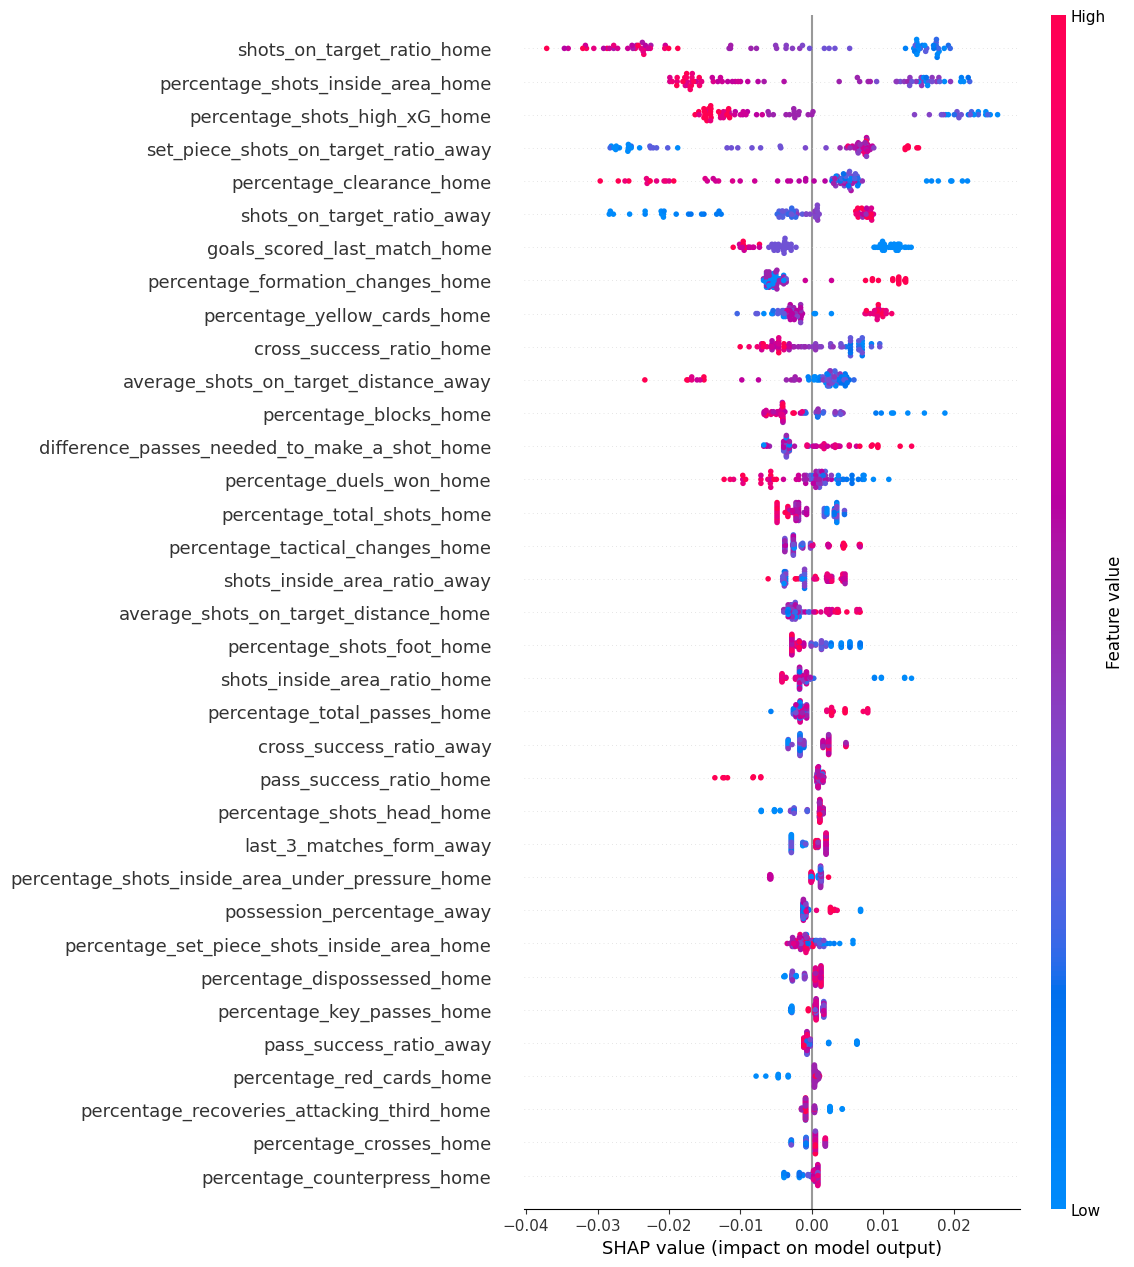

Class 1: draw
Important features (31):
['shots_on_target_ratio_home', 'shots_on_target_ratio_away', 'average_shots_on_target_distance_away', 'shots_inside_area_ratio_home', 'shots_inside_area_ratio_away', 'pass_success_ratio_home', 'pass_success_ratio_away', 'cross_success_ratio_home', 'cross_success_ratio_away', 'set_piece_shots_on_target_ratio_home', 'set_piece_shots_on_target_ratio_away', 'win_rate_last_5_matches_home', 'goals_scored_last_match_home', 'percentage_total_shots_home', 'percentage_shots_high_xG_home', 'percentage_shots_inside_area_home', 'percentage_shots_head_home', 'percentage_total_passes_home', 'percentage_blocks_home', 'percentage_duels_won_home', 'percentage_clearance_home', 'percentage_yellow_cards_home', 'percentage_pressures_home', 'percentage_counterpress_home', 'percentage_dribbles_home', 'percentage_recoveries_attacking_third_home', 'percentage_passes_under_pressure_home', 'percentage_set_piece_shots_inside_area_home', 'percentage_tactical_substitutions_home

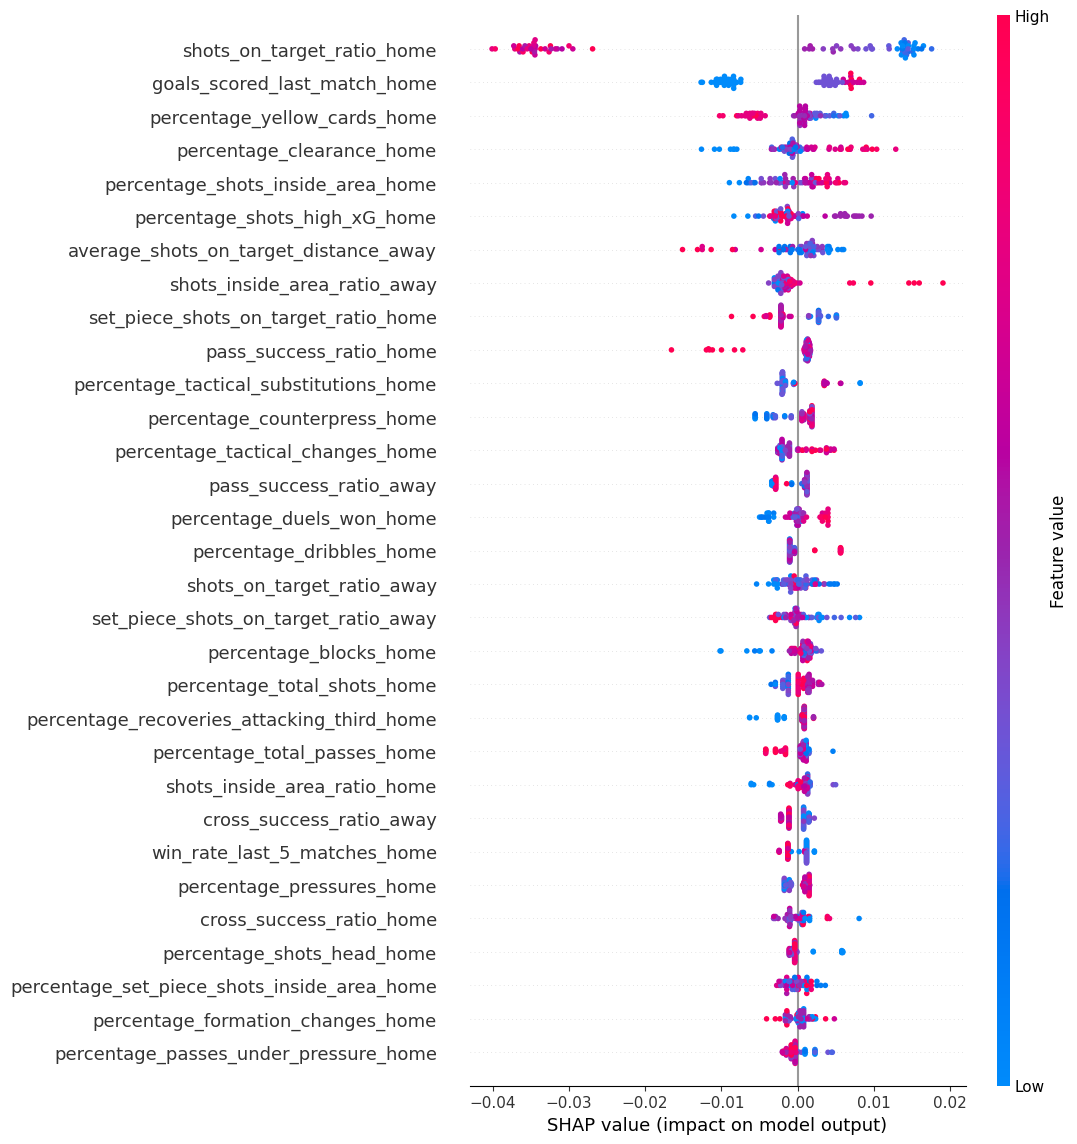

Class 2: home_team
Important features (38):
['shots_on_target_ratio_home', 'shots_on_target_ratio_away', 'average_shots_on_target_distance_home', 'average_shots_on_target_distance_away', 'shots_inside_area_ratio_home', 'shots_inside_area_ratio_away', 'pass_success_ratio_home', 'pass_success_ratio_away', 'cross_success_ratio_home', 'cross_success_ratio_away', 'possession_percentage_away', 'set_piece_shots_on_target_ratio_home', 'set_piece_shots_on_target_ratio_away', 'last_3_matches_form_away', 'win_rate_last_5_matches_home', 'goals_scored_last_match_home', 'std_shots_last_3_matches_home', 'percentage_total_shots_home', 'percentage_shots_high_xG_home', 'percentage_shots_inside_area_home', 'percentage_shots_foot_home', 'percentage_shots_head_home', 'difference_passes_needed_to_make_a_shot_home', 'percentage_blocks_home', 'percentage_duels_won_home', 'percentage_clearance_home', 'percentage_yellow_cards_home', 'percentage_red_cards_home', 'percentage_pressures_home', 'percentage_counterpr

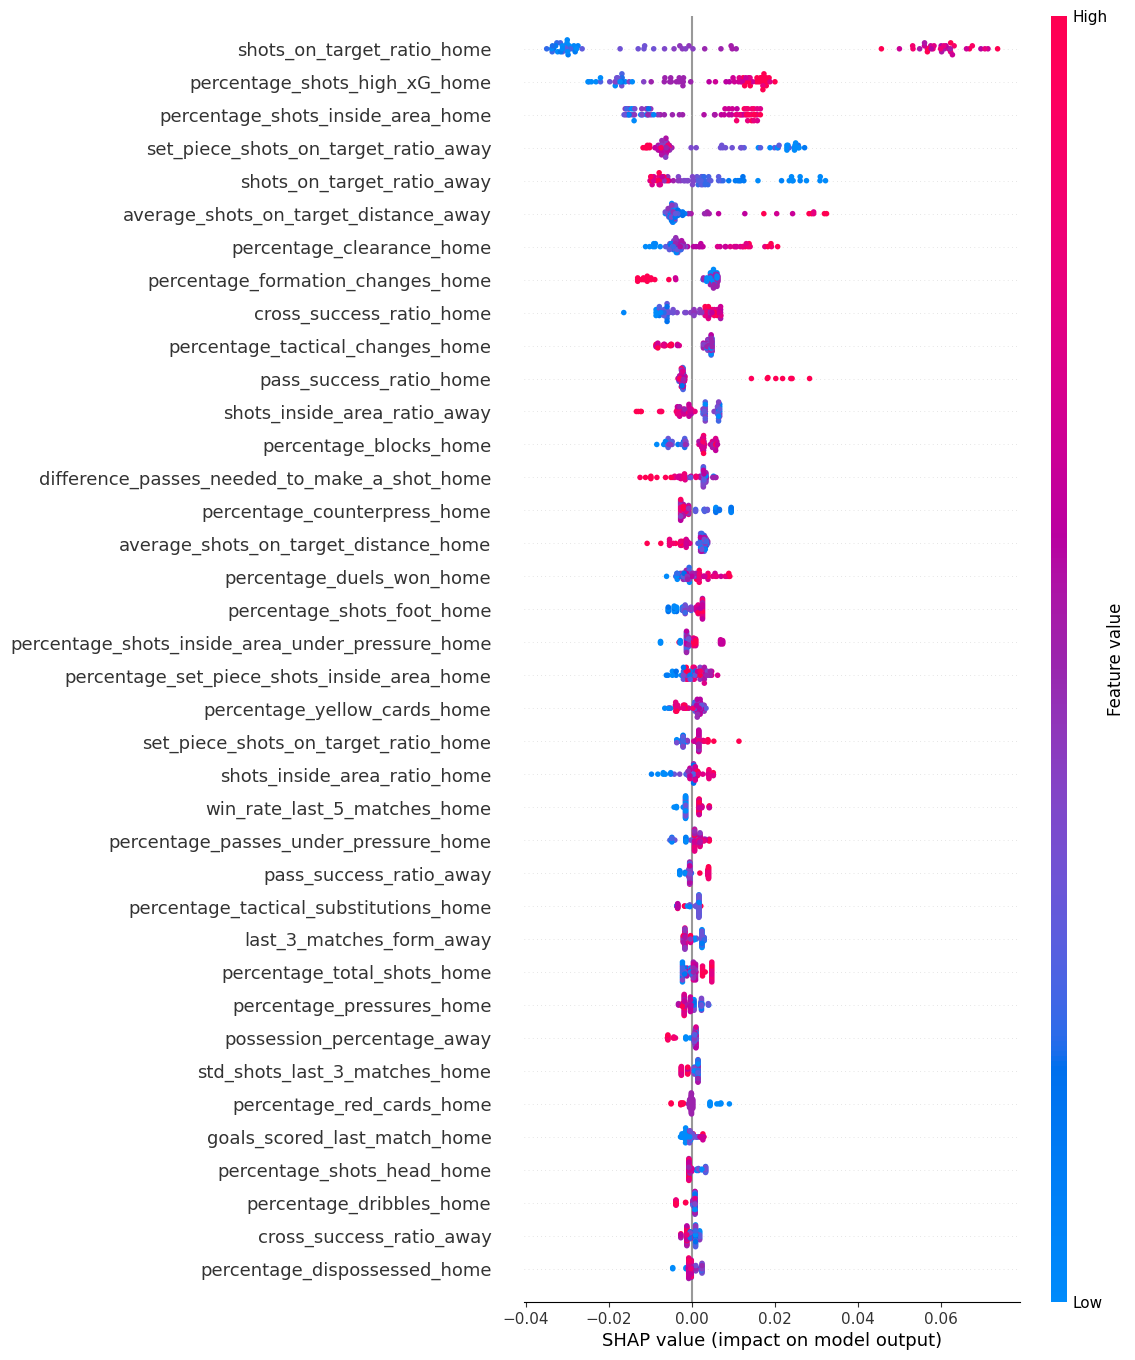

In [6]:
from src.analysis import plot_shap_summary

plot_shap_summary(shap_values_Ligue1, feature_names_list_Ligue1, encoder_Ligue1, threshold=0.001)

Vamos a analizar cada uno de los gráficos:

- **Victoria del equipo visitante**: Este gráfico muestra las características que favorecen o disminuyen la probabilidad de victoria del equipo visitante en la Ligue 1.
    - **Características que favorecen la victoria del equipo visitante**: 📈
        - `shots_on_target_ratio_away`: Un equipo visitante con un alto porcentaje de tiros a puerta es más eficiente en ataque, lo que aumenta sus probabilidades de marcar y ganar el partido.
        - `set_piece_shots_on_target_ratio_away`: Si el equipo visitante tiene precisión en jugadas a balón parado, puede aprovechar estas oportunidades para anotar goles clave.
        - `percentage_formation_changes_home`: Si el equipo local hace más cambios de formación que el equipo visitante eso significa que el equipo local esta viéndose superado lo que indica que el equipo visitante tiene más opciones de llavarse el partido.
        - `percentage_yellow_cards_home`: Si el equipo local recibe más tarjetas amarillas que el equipo visitante, eso significa que tiene más opciones de recibir una tarjeta roja y que deben andarse con más cuidado.
        - `difference_passes_needed_to_make_a_shot_home`: Si el equipo local necesita más pases que el equipo visitante para realizar un tiro significa que el juego del equipo visitante es un juego más directo y efectivo lo que parece favorecer al equipo visitante.
        - `percentage_tactical_changes_home`: Un equipo local que necesita hacer muchos cambios tácticos puede estar teniendo dificultades en el partido, lo que favorece al equipo visitante.
        - `shots_inside_area_ratio_away`: Si un alto porcentaje de los tiros que ha hecho el equipo visitante han sido desde dentro del área aumentan las opciones de que gane el equipo visitante ya que son tiros normalmente más peligrosos.
        - `average_shots_on_target_distance_home`: Si el equipo local realiza tiros desde distancias más lejanas, disminuye la calidad de sus ocasiones y su posibilidad de marcar, lo que hace que aumenten las opciones de que el equipo visitante gane el partido.
        - `percentage_dispossessed_home`: Un equipo local que pierde el balón con frecuencia facilita oportunidades de contraataque para el equipo visitante.
    - **Características que no favorecen la victoria del equipo visitante**: 📉
        - `shots_on_target_ratio_home`: Un equipo local con un alto porcentaje de tiros a puerta genera peligro y reduce las posibilidades de que el equipo visitante gane.
        - `percentage_shots_inside_area_home`: Un equipo local que dispara mucho desde dentro del área genera más peligro y puede hacer más difícil la victoria visitante.
        - `percentage_shots_high_xG_home`: Un equipo local que genera disparos con alta expectativa de gol (xG) es más probable que convierta sus oportunidades, dificultando la victoria visitante.
        - `percentage_clearance_home`: Un equipo local con más despejes en el partido que el equipo visitante puede reflejar que el equipo local se esta defendiendo bien lo que hace difícil la victoria del equipo visitante.
        - `goals_scored_last_match_home`: Si el equipo local viene de anotar varios goles en su último partido, puede llegar con confianza y efectividad, complicando el triunfo visitante.
        - `cross_success_ratio_home`: Un equipo local con un alto porcentaje de precisión en centros puede hacer ver que están creando ocasiones de gol lo que hace que disminuyan las opciones del equipo visitante de ganar el partido.
        - `percentage_blocks_home`: Si el equipo local bloquea muchos tiros, está reduciendo la efectividad ofensiva del equipo visitante y dificultando sus opciones de anotar.
        - `percentage_duels_won_home`: Si el equipo local gana más duelos que el equipo visitante esto puede significar que están siendo más intensos en el aspecto físico del partido.
        - `percentage_total_shots_home`: Si el equipo local realiza más tiros que el equipo visitante, aumentan sus opciones de ganar el partido por el simple hecho de haber intentado marcar más veces.
        - `shots_inside_area_ratio_home_`: Si un alto porcentaje de los tiros que ha hecho el equipo local han sido desde dentro del área aumentan las opciones de que gane el equipo local ya que son tiros normalmente más peligrosos.
    - **Conclusión**: La victoria del equipo visitante en la Ligue 1 está determinada por su efectividad en ataque, la capacidad de aprovechar los errores del equipo local y su superioridad táctica. Factores clave como un alto porcentaje de tiros a puerta, la precisión en jugadas a balón parado y la generación de tiros dentro del área aumentan sus probabilidades de éxito. Además, un equipo visitante que juega de manera más directa y efectiva, con menos necesidad de pases para generar un disparo, tiene más opciones de imponerse en el partido. Por otro lado, si el equipo local tiene una alta efectividad en sus tiros, genera ocasiones con alta expectativa de gol (xG) y domina en duelos físicos, la victoria visitante se vuelve más complicada. Asimismo, un equipo local que bloquea tiros, despeja bien y mantiene un alto porcentaje de precisión en centros puede reducir significativamente las opciones de que el visitante se lleve el partido.

- **Empate**: Este gráfico muestra las características que favorecen o disminuyen la probabilidad de empate en un partido en la Ligue 1. El empate en un partido se ve influenciado por el equilibrio entre ambos equipos en aspectos ofensivos, defensivos y de control del juego.
    - **Características que favorecen el empate**: 📈
        - `percentage_clearance_home`: Si el equipo local realiza muchos despejes en el partido puede indicar que ha sido complicado anotarle un gol, consiguiendo de esta manera que aumenten las opciones de que se de un empate.
        - `goals_scored_last_match_home`: Si el equipo local no ha anotado goles en su último partido puede indicar que viene en mala forma y que tiene complicado conseguir un empate, sin embargo, si viene de anotar algún tanto en el partido aunque sea sabemos que no viene en mala forma y que podría darse un empate.
        - `percentage_counterpress_home`: Un equipo local que presiona alto puede generar un partido trabado y con menos transiciones claras, favoreciendo un empate.
        - `percentage_tactical_changes_home`: Si el equipo local realiza cambios tácticos en un intento por controlar el partido sin volcarse al ataque, esto puede mantener el marcador parejo.
        - `percentage_duels_won_home`: Si el equipo local gana muchos duelos, el partido se vuelve más trabado y menos fluido, lo que favorece un marcador cerrado.
        - `percentage_blocks_home`: Si el equipo local bloquea muchos tiros, está reduciendo la efectividad ofensiva del equipo visitante y dificultando sus opciones de anotar, lo que favorece a un marcador más cerrado.
        - `shots_inside_area_ratio_home` y `shots_inside_area_ratio_away`: Si ambos equipos generan tiros dentro del área sin convertir goles, el partido puede mantenerse igualado hasta el final.
    - **Características que no favorecen el empate**: 📉
        - `shots_on_target_ratio_home`: Si el equipo local tiene una alta precisión en sus tiros a puerta, aumenta la posibilidad de marcar y romper el empate.
        - `percentage_yellow_cards_home`: Si el equipo local recibe más tarjetas amarillas que el equipo visitante, eso significa que tiene más opciones de recibir una tarjeta roja y que deben andarse con más cuidado. Además puede ser sintoma de la frustración del equipo local tras estar viendose superado en el partido.
        - `percentage_shots_high_xG_home`: Si el equipo local genera oportunidades con alta expectativa de gol (xG), es más probable que convierta y rompa la igualdad.
        - `average_shots_on_target_distance_away`: Si la distancia media de los tiros del equipo visitante es una distancia elevada, hace que aumenten las probabilidades de que el gane el equipo local.
        - `cross_success_ratio_home` y `cross_success_ratio_away`: Si uno de los equipos tiene una alta precisión en los centros, puede generar más peligro y romper el equilibrio del partido.
        - `win_rate_last_5_matches_home`: Si el equipo local ha tenido un buen rendimiento en los últimos cinco partidos, es más probable que mantenga el impulso y consiga la victoria en lugar de empatar.
        - `percentage_passes_under_pressure_home`: Si el equipo local logra completar pases bajo presión, puede controlar mejor el partido y generar más oportunidades de gol.
    - **Conclusión**: El empate en la Ligue 1 suele darse cuando ningún equipo logra imponerse con claridad y el partido se mantiene equilibrado en términos de posesión, duelos físicos y oportunidades de gol. Factores como la solidez defensiva del equipo local, el éxito en la presión alta y la cantidad de tiros bloqueados contribuyen a que el marcador se mantenga parejo a lo largo del partido. Sin embargo, el empate se vuelve menos probable cuando uno de los equipos genera más oportunidades claras (xG), tiene una alta precisión en sus tiros a puerta y domina en aspectos clave como los centros efectivos y los pases bajo presión. Además, un equipo local que viene con una buena racha en los últimos cinco partidos es más propenso a conseguir una victoria en lugar de empatar.

- **Victoria del equipo local**: Este gráfico muestra las características que favorecen o disminuyen la probabilidad de victoria del equipo local en la Ligue 1.
    - **Características que favorecen la victoria del equipo local**: 📈
        - `shots_on_target_ratio_home`: Un equipo local con un alto porcentaje de tiros a puerta genera más peligro y aumenta sus posibilidades de marcar y ganar el partido.
        - `percentage_shots_high_xG_home`: Si los tiros del equipo local tienen un alto expected goals (xG), son más peligrosos y pueden traducirse en goles con mayor frecuencia.
        - `percentage_shots_inside_area_home`: Un equipo local que genera muchos tiros dentro del área tiene más probabilidades de marcar, ya que estos disparos suelen ser más efectivos.
        - `average_shots_on_target_distance_away`: Si la distancia media de los tiros del equipo visitante es una distancia elevada, hace que aumenten las probabilidades de que el gane el equipo local.
        - `percentage_clearance_home`: Una defensa efectiva que despeja los balones con éxito reduce las oportunidades de gol del equipo visitante y ayuda a mantener la ventaja en el marcador.
        - `cross_success_ratio_home`: Si el equipo local tiene una alta precisión en los centros, puede generar más peligro y romper el equilibrio del partido.
        - `percentage_blocks_home`: Si el equipo local bloquea muchos tiros, significa quue esta defendiendo bien.
        - `percentage_duels_won_home`: Ganar más duelos en el partido permite al equipo local imponerse físicamente y recuperar la posesión en zonas clave.
        - `percentage_shots_foot_home`: Un alto número de disparos con el pie indica que el equipo local está generando oportunidades más claras en comparación con tiros de cabeza, lo que aumenta la probabilidad de marcar.
        - `set_piece_shots_on_target_ratio_home`: Si el equipo local es preciso en jugadas a balón parado, puede aprovechar estas oportunidades para anotar y aumentar sus posibilidades de victoria.
        - `win_rate_last_5_matches_home`: Un equipo local con una buena racha en los últimos cinco partidos llega en un estado de forma óptimo, aumentando sus probabilidades de ganar.
        - `shots_inside_area_ratio_home`: Si un alto porcentaje de los tiros que ha hecho el equipo local han sido desde dentro del área aumentan las opciones de que gane el equipo local ya que son tiros normalmente más peligrosos.
        - `percentage_shots_inside_area_under_pressure_home`: Si el equipo local consigue finalizar jugadas dentro del área a pesar de la presión defensiva, tiene más probabilidades de convertir y ganar el partido.
    - **Características que no favorecen la victoria del equipo local**: 📉
        - `set_piece_shots_on_target_ratio_away`: Si el equipo visitante es preciso en jugadas a balón parado, puede generar peligro y reducir las posibilidades de victoria del equipo local.
        - `shots_on_target_ratio_away`: Si el equipo visitante tiene un alto porcentaje de tiros a puerta, puede generar más peligro y reducir las opciones de victoria del equipo local.
        - `percentage_formation_changes_home` y `percentage_tactical_changes_home`: Si el equipo local realiza demasiados cambios de formación o tácticos, podría indicar falta de estabilidad táctica, lo que puede ser un factor negativo para su rendimiento.
        - `shots_inside_area_ratio_away`: Si un alto porcentaje de los tiros que ha hecho el equipo visitante han sido desde dentro del área aumentan las opciones de que gane el equipo visitante ya que son tiros normalmente más peligrosos.
        - `difference_passes_needed_to_make_a_shot_home`: Si el equipo local necesita más pases que el equipo visitante para realizar un tiro significa que el juego del equipo visitante es un juego más directo y efectivo lo que parece favorecer al equipo visitante.
        - `average_shots_on_target_distance_home`: Si la distancia media de los tiros del equipo visitante es una distancia elevada, hace que aumenten las probabilidades de que el gane el equipo local.
        - `percentage_red_cards_home`: Un equipo local que recibe tarjetas rojas podría quedarse con menos jugadores, debilitando su estructura defensiva y complicando sus opciones de victoria.
    - **Conclusión**: La victoria del equipo local en la Ligue 1 está influenciada principalmente por su efectividad ofensiva, solidez defensiva y control del partido. Un equipo que genera muchas oportunidades de gol dentro del área, mantiene una alta precisión en los tiros a puerta y domina en los duelos físicos tiene mayores probabilidades de imponerse en el marcador. Además, su capacidad para ejecutar jugadas a balón parado con precisión, realizar despejes efectivos y bloquear tiros rivales refuerza su solidez y dificulta el ataque del equipo visitante. Por otro lado, la victoria local se complica si el equipo visitante logra generar tiros peligrosos desde dentro del área, tiene una alta precisión en jugadas a balón parado y muestra un estilo de juego más directo y efectivo. Además, factores como la falta de estabilidad táctica, la acumulación de tarjetas rojas y la dependencia de tiros desde larga distancia pueden debilitar al equipo local y darle ventaja al equipo visitante.

- **Conclusiones generales**:
    - *Victoria del equipo visitante*: La victoria del equipo visitante en la Ligue 1 se ve favorecida cuando el equipo logra ser efectivo en ataque, tiene un juego directo y aprovecha los errores del equipo local. Un alto porcentaje de tiros a puerta y precisión en jugadas a balón parado aumentan considerablemente sus posibilidades de éxito. Además, si el equipo local muestra inestabilidad táctica, con constantes cambios de formación o un juego poco efectivo que requiera muchos pases para generar oportunidades, el visitante se beneficia. Sin embargo, si el equipo local es sólido en defensa, con una alta efectividad en sus disparos y un dominio en los duelos físicos, la victoria del visitante se vuelve más complicada.
    - *Empate*: El empate en la Ligue 1 se produce cuando ambos equipos se neutralizan mutuamente en ataque y defensa, resultando en un partido cerrado. Equipos que destacan por su solidez defensiva, con muchos despejes y bloqueos de tiros, tienen más posibilidades de mantener el marcador parejo. Asimismo, una presión alta efectiva y una gran cantidad de duelos ganados pueden hacer que el partido sea trabado, sin un claro dominador. Sin embargo, el empate se vuelve menos probable cuando uno de los equipos es más preciso en sus tiros a puerta, genera oportunidades con alta expectativa de gol (xG) y domina en aspectos clave como los centros y los pases bajo presión. Un equipo con un buen rendimiento reciente también es menos propenso a conformarse con el empate y buscará la victoria.
    - *Victoria del equipo local*: La victoria del equipo local está determinada por su capacidad para generar peligro en el área rival, mantener una defensa sólida y controlar el ritmo del partido. Un alto porcentaje de tiros a puerta, la efectividad en jugadas a balón parado y la capacidad para ganar duelos físicos le dan al equipo local una ventaja significativa. Además, si el equipo visitante recurre a tiros lejanos o no tiene precisión en su ataque, el equipo local se favorece aún más. Sin embargo, la victoria local se complica si el equipo visitante tiene un alto porcentaje de tiros a puerta, es preciso en jugadas a balón parado y consigue generar peligro desde dentro del área. Factores como la inestabilidad táctica, la acumulación de tarjetas rojas o la dificultad del equipo local para mantener la posesión bajo presión también pueden reducir sus posibilidades de éxito.
    - *Factores no determinantes*: Algunos factores no parecen determinantes en el resultado de los partidos en la Ligue 1. Por ejemplo, el número total de pases realizados por un equipo no es un indicador claro de victoria, ya que la posesión por sí sola no garantiza generar oportunidades de gol efectivas. Asimismo, la cantidad de faltas cometidas no parece tener un impacto significativo a menos que resulten en tarjetas rojas o penaltis. Algunos cambios tácticos pueden reflejar problemas en el equipo, pero no siempre afectan directamente el resultado final. Además, aunque las estadísticas defensivas como despejes y bloqueos son importantes para mantener un marcador cerrado, por sí solas no determinan quién ganará el partido.